In [1]:



!pip install statsmodels
!pip install pandas


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

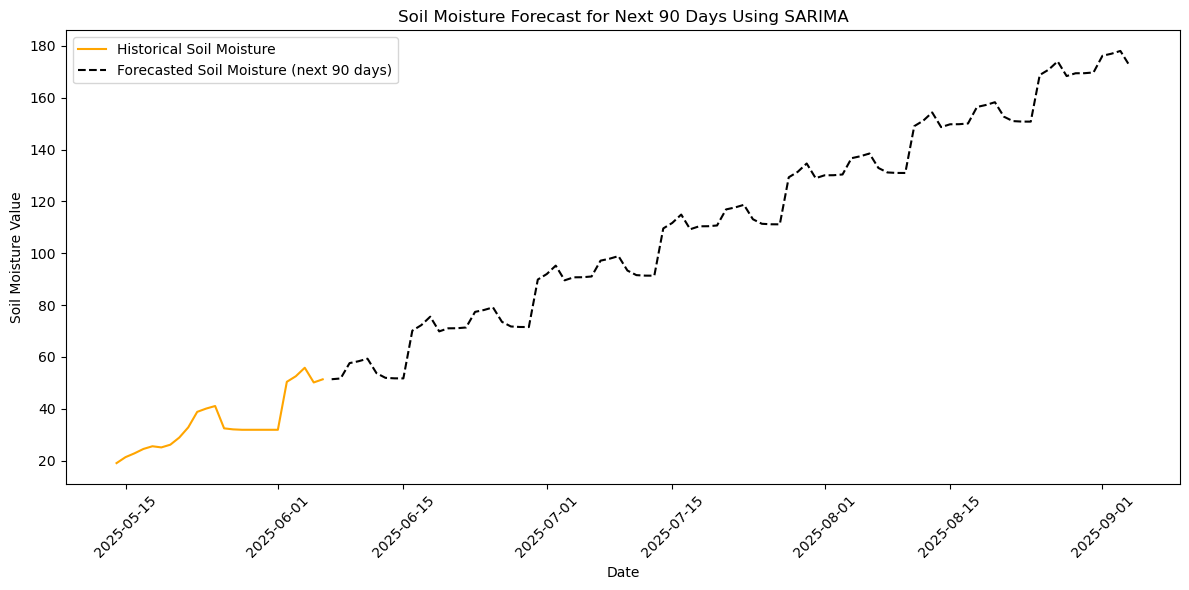

In [2]:
# Load and prepare data
df = pd.read_csv("merged_cleanv2.csv", parse_dates=['dbtimestamp'])
df = df.sort_values('dbtimestamp')

# Filter EC sensor (sensorid == 11)
df_ec = df[df['sensorid'] == 9]

# Set datetime index and resample daily, fill missing values
df_ec = df_ec.set_index('dbtimestamp').sort_index()
df_ec_daily = df_ec['value'].resample('D').mean().fillna(method='ffill')

# Train on all data
train = df_ec_daily

# Fit SARIMA model
# order=(p,d,q), seasonal_order=(P,D,Q,s) --> weekly seasonality = s=7
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,7))
results = model.fit()

# Forecast next 90 days
forecast_steps = 90
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

# Plot historical + forecast
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Historical Soil Moisture', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Soil Moisture (next 90 days)', linestyle='--', color = 'black')
plt.title('Soil Moisture Forecast for Next 90 Days Using SARIMA')
plt.xlabel('Date')
plt.ylabel('Soil Moisture Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


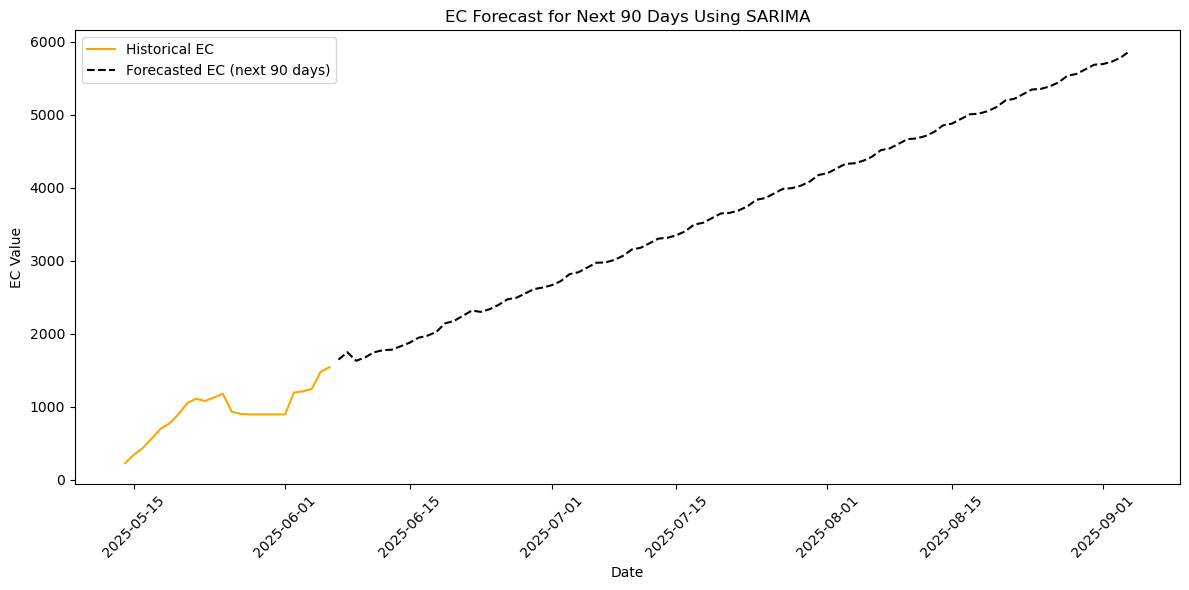

In [8]:

# Load and prepare data
df = pd.read_csv("merged_cleanv2.csv", parse_dates=['dbtimestamp'])
df = df.sort_values('dbtimestamp')

# Filter EC sensor (sensorid == 11)
df_ec = df[df['sensorid'] == 11]

# Set datetime index and resample daily, fill missing values
df_ec = df_ec.set_index('dbtimestamp').sort_index()
df_ec_daily = df_ec['value'].resample('D').mean().fillna(method='ffill')

# Train on all data
train = df_ec_daily

# Fit SARIMA model
# order=(p,d,q), seasonal_order=(P,D,Q,s) --> weekly seasonality = s=7
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,7))
results = model.fit()

# Forecast next 90 days
forecast_steps = 90
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

# Plot historical + forecast
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Historical EC', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Forecasted EC (next 90 days)', linestyle='--', color = 'black')
plt.title('EC Forecast for Next 90 Days Using SARIMA')
plt.xlabel('Date')
plt.ylabel('EC Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


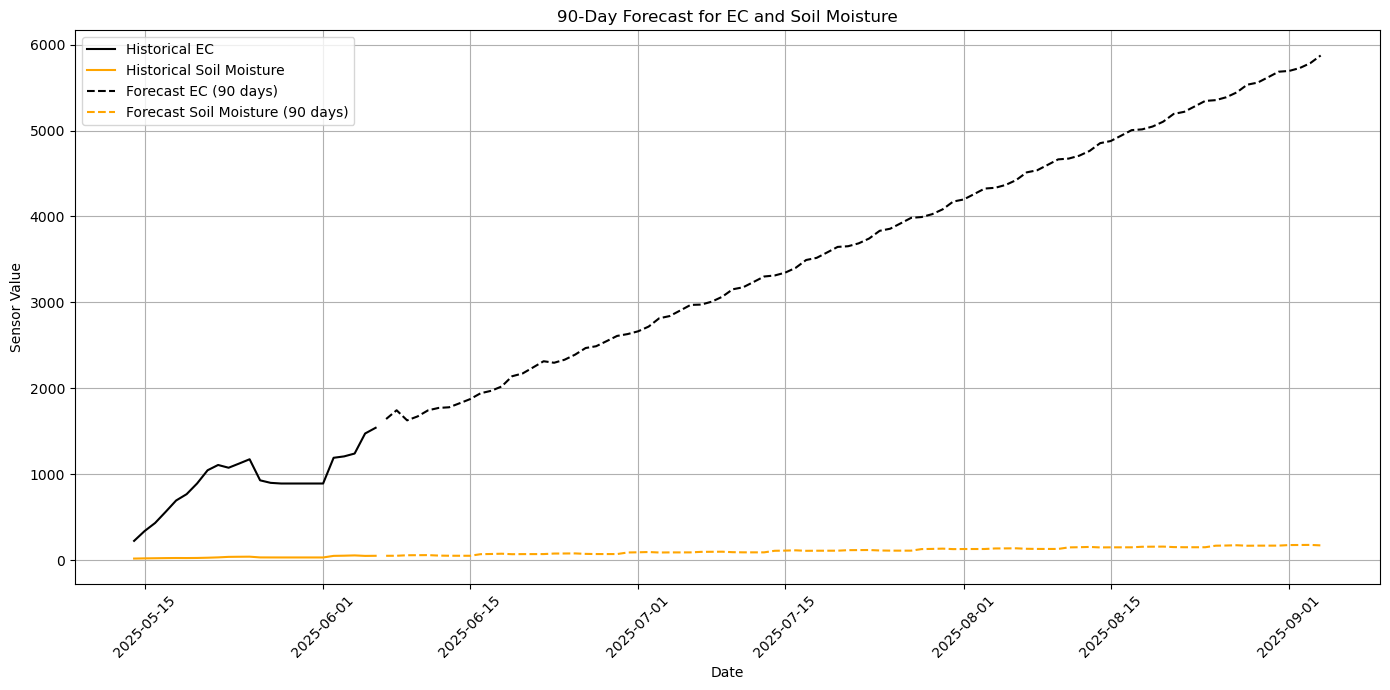

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and prepare data
df = pd.read_csv("merged_cleanv2.csv", parse_dates=['dbtimestamp'])
df = df.sort_values('dbtimestamp')

# --- Function to prepare and forecast for a given sensorid ---
def forecast_sensor(df, sensorid, label, order=(1,1,1), seasonal_order=(1,1,1,7), steps=90):
    df_sensor = df[df['sensorid'] == sensorid]
    df_sensor = df_sensor.set_index('dbtimestamp').sort_index()
    df_daily = df_sensor['value'].resample('D').mean().fillna(method='ffill')

    # Train SARIMA
    model = SARIMAX(df_daily, order=order, seasonal_order=seasonal_order)
    results = model.fit(disp=False)
    
    forecast_index = pd.date_range(start=df_daily.index[-1] + pd.Timedelta(days=1), periods=steps, freq='D')
    forecast_series = pd.Series(results.get_forecast(steps=steps).predicted_mean.values, index=forecast_index)
    
    return df_daily, forecast_series, label

# Forecast EC and Soil Moisture
ec_hist, ec_forecast, ec_label = forecast_sensor(df, sensorid=11, label="EC")
sm_hist, sm_forecast, sm_label = forecast_sensor(df, sensorid=9, label="Soil Moisture")

# --- Plot combined chart with updated colors ---
plt.figure(figsize=(14,7))

# Historical
plt.plot(ec_hist.index, ec_hist, label=f'Historical {ec_label}', color='black')
plt.plot(sm_hist.index, sm_hist, label=f'Historical {sm_label}', color='orange')

# Forecasts
plt.plot(ec_forecast.index, ec_forecast, label=f'Forecast {ec_label} (90 days)', linestyle='--', color='black')
plt.plot(sm_forecast.index, sm_forecast, label=f'Forecast {sm_label} (90 days)', linestyle='--', color='orange')

# Formatting
plt.title('90-Day Forecast for EC and Soil Moisture')
plt.xlabel('Date')
plt.ylabel('Sensor Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


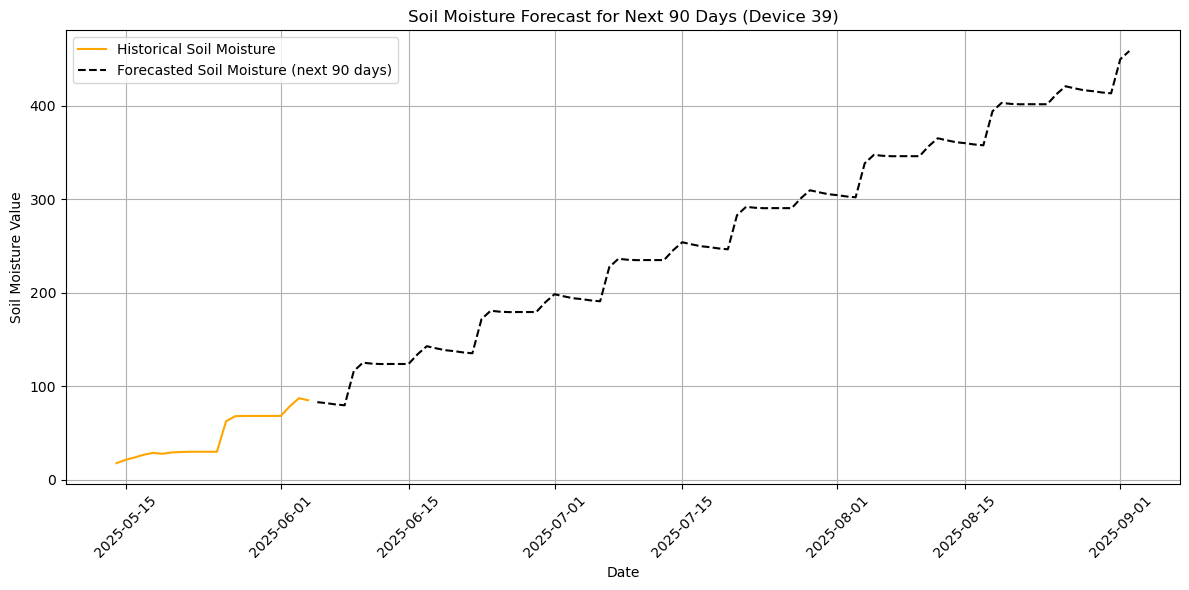

In [12]:


# Load and prepare data
df = pd.read_csv("merged_cleanv2.csv", parse_dates=['dbtimestamp'])
df = df.sort_values('dbtimestamp')

# Filter for deviceid 39 and soil moisture sensor (sensorid == 9)
df_soil = df[(df['deviceid'] == 39) & (df['sensorid'] == 9)]

# Set datetime index and resample daily, forward fill missing values
df_soil = df_soil.set_index('dbtimestamp').sort_index()
df_soil_daily = df_soil['value'].resample('D').mean().fillna(method='ffill')

# Train on all available data
train = df_soil_daily

# Fit SARIMA model: (p,d,q)(P,D,Q,s) with weekly seasonality (s=7)
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
results = model.fit(disp=False)

# Forecast next 90 days (approx. 3 months)
forecast_steps = 90
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

# Plot historical + forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Historical Soil Moisture', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Soil Moisture (next 90 days)', linestyle='--', color='black')
plt.title('Soil Moisture Forecast for Next 90 Days (Device 39)')
plt.xlabel('Date')
plt.ylabel('Soil Moisture Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


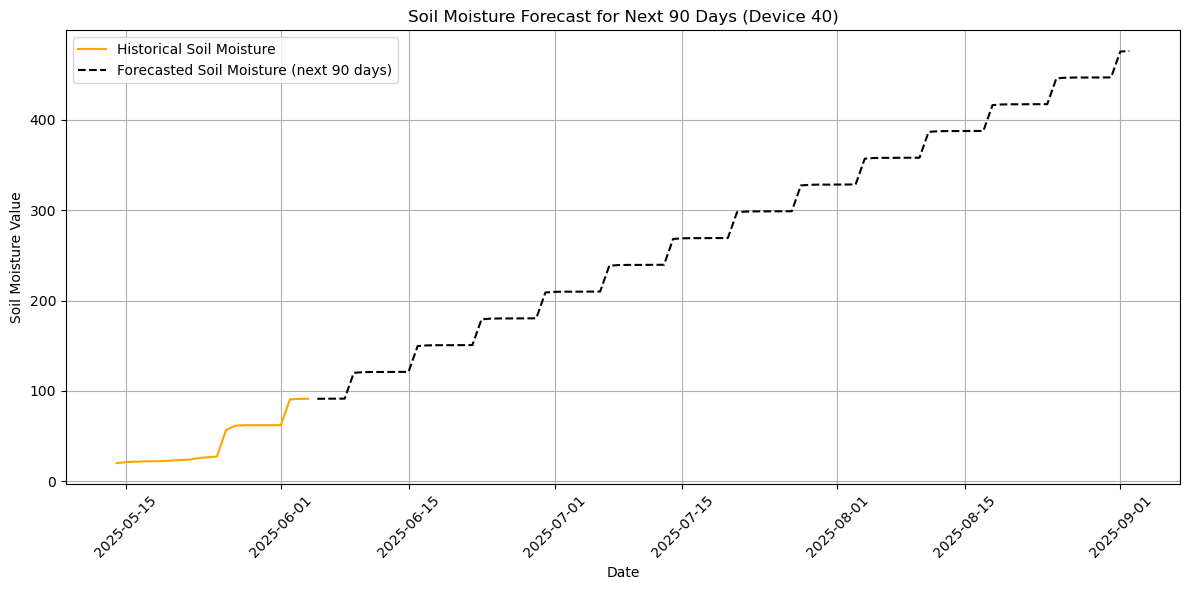

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and prepare data
df = pd.read_csv("merged_cleanv2.csv", parse_dates=['dbtimestamp'])
df = df.sort_values('dbtimestamp')

# Filter for deviceid 39 and soil moisture sensor (sensorid == 9)
df_soil = df[(df['deviceid'] == 40) & (df['sensorid'] == 9)]

# Set datetime index and resample daily, forward fill missing values
df_soil = df_soil.set_index('dbtimestamp').sort_index()
df_soil_daily = df_soil['value'].resample('D').mean().fillna(method='ffill')

# Train on all available data
train = df_soil_daily

# Fit SARIMA model: (p,d,q)(P,D,Q,s) with weekly seasonality (s=7)
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
results = model.fit(disp=False)

# Forecast next 90 days (approx. 3 months)
forecast_steps = 90
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

# Plot historical + forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Historical Soil Moisture', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Soil Moisture (next 90 days)', linestyle='--', color='black')
plt.title('Soil Moisture Forecast for Next 90 Days (Device 40)')
plt.xlabel('Date')
plt.ylabel('Soil Moisture Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


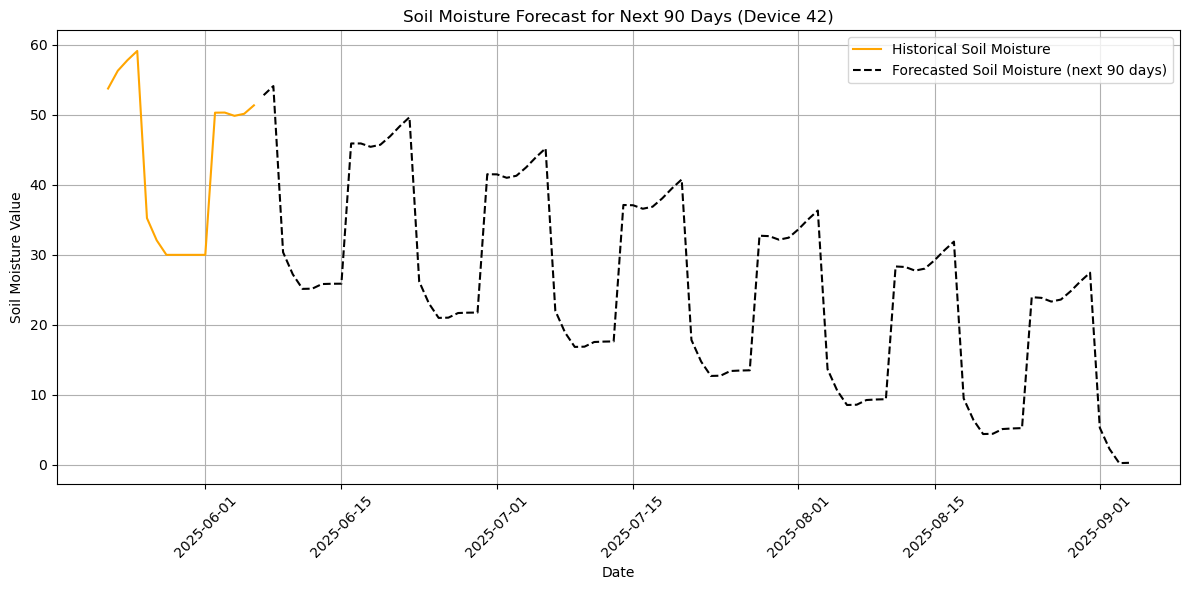

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and prepare data
df = pd.read_csv("merged_cleanv2.csv", parse_dates=['dbtimestamp'])
df = df.sort_values('dbtimestamp')

# Filter for deviceid 39 and soil moisture sensor (sensorid == 9)
df_soil = df[(df['deviceid'] == 42) & (df['sensorid'] == 9)]

# Set datetime index and resample daily, forward fill missing values
df_soil = df_soil.set_index('dbtimestamp').sort_index()
df_soil_daily = df_soil['value'].resample('D').mean().fillna(method='ffill')

# Train on all available data
train = df_soil_daily

# Fit SARIMA model: (p,d,q)(P,D,Q,s) with weekly seasonality (s=7)
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
results = model.fit(disp=False)

# Forecast next 90 days (approx. 3 months)
forecast_steps = 90
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

# Plot historical + forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Historical Soil Moisture', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Soil Moisture (next 90 days)', linestyle='--', color='black')
plt.title('Soil Moisture Forecast for Next 90 Days (Device 42)')
plt.xlabel('Date')
plt.ylabel('Soil Moisture Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [1]:
import pandas as pd

# 1. Load and sort
df = pd.read_csv("merged_cleanv2.csv", parse_dates=['dbtimestamp'])
df = df.sort_values('dbtimestamp')

# 2. Filter for device 39 and the soil sensors you care about
sensor_ids = [9, 10, 11, 12, 13, 14]
df_filt = df[(df['deviceid'] == 39) & (df['sensorid'].isin(sensor_ids))]

# 3. Pivot so that each sensorid has its own column of values
df_wide = df_filt.pivot(index='dbtimestamp', columns='sensorid', values='value')

# 4. (Optional) Rename columns to something more descriptive
sensor_names = {
    9:  'soil_moisture',
    10: 'soil_ph',
    11: 'soil_ec',
    12: 'soil_nitrogen',
    13: 'soil_phosphorus',
    14: 'soil_potassium'
}
df_wide = df_wide.rename(columns=sensor_names)

# 5. (Optional) Resample to daily means and forward-fill gaps
df_daily = (
    df_wide
      .resample('D')
      .mean()
      .ffill()
)

# Inspect result
print(df_wide.head())      # original timestamp resolution
print(df_daily.head())     # daily-aggregated


sensorid                    soil_moisture  soil_ph  soil_ec  soil_nitrogen  \
dbtimestamp                                                                  
2025-05-14 06:22:33.575119           15.6      3.4    171.0            0.0   
2025-05-14 06:23:16.575567           17.8      6.1    171.0            0.0   
2025-05-14 06:23:53.028696           16.9      6.2    171.0            0.0   
2025-05-14 06:24:29.592199           16.2      6.2    171.0            0.0   
2025-05-14 06:25:06.060400           15.7      6.3    171.0            0.0   

sensorid                    soil_phosphorus  
dbtimestamp                                  
2025-05-14 06:22:33.575119             39.0  
2025-05-14 06:23:16.575567             39.0  
2025-05-14 06:23:53.028696             39.0  
2025-05-14 06:24:29.592199             39.0  
2025-05-14 06:25:06.060400             39.0  
sensorid     soil_moisture   soil_ph     soil_ec  soil_nitrogen  \
dbtimestamp                                                     

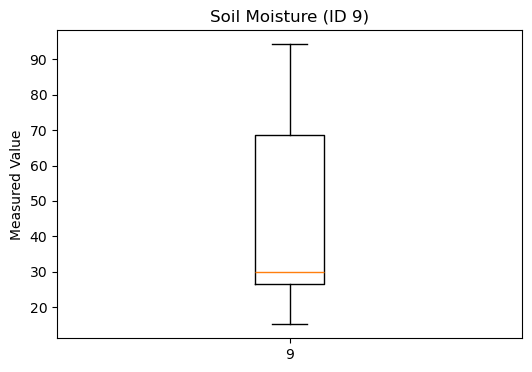

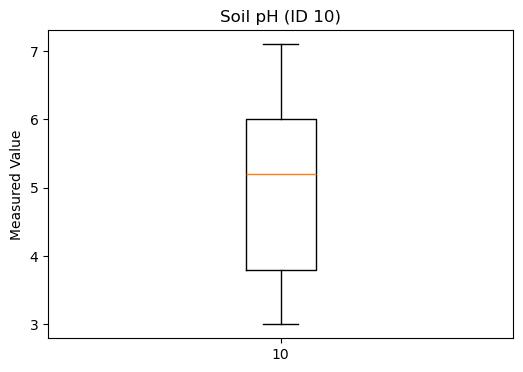

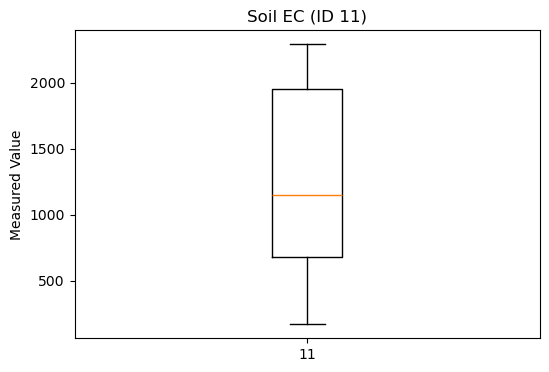

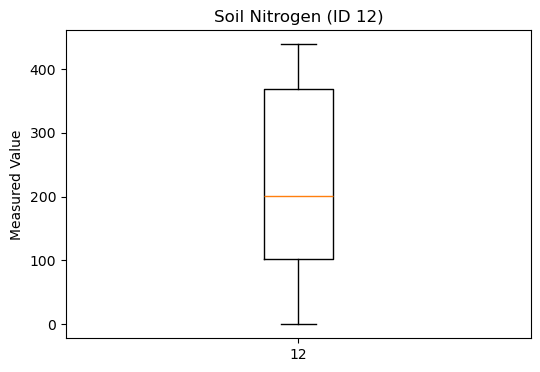

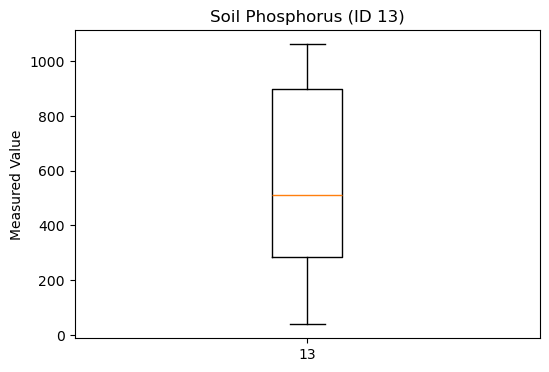

In [2]:
##### import pandas as pd
import matplotlib.pyplot as plt

# 1. Load & filter
df = pd.read_csv("merged_cleanv2.csv", parse_dates=['dbtimestamp'])
df = df.sort_values('dbtimestamp')
sensor_ids = [9, 10, 11, 12, 13]
df_filt = df[(df['deviceid'] == 39) & (df['sensorid'].isin(sensor_ids))]

# 2. Pivot to wide form
df_wide = df_filt.pivot(index='dbtimestamp', columns='sensorid', values='value')

# 3. (Optional) Map IDs to descriptive names
sensor_names = {
    9:  'Soil Moisture',
    10: 'Soil pH',
    11: 'Soil EC',
    12: 'Soil Nitrogen',
    13: 'Soil Phosphorus'
}

# 4. Loop over each sensor and draw its own box‐plot
for sid in sensor_ids:
    data = df_wide[sid].dropna()
    plt.figure(figsize=(6, 4))
    plt.boxplot(data, showfliers=True)
    plt.title(f"{sensor_names.get(sid, f'Sensor {sid}')} (ID {sid})")
    plt.ylabel("Measured Value")
    plt.xticks([1], [sid])
    plt.show()


In [3]:
df_wide.head()

sensorid,9,10,11,12,13
dbtimestamp,,,,,
2025-05-14 06:22:33.575119,15.6,3.4,171.0,0.0,39.0
2025-05-14 06:23:16.575567,17.8,6.1,171.0,0.0,39.0
2025-05-14 06:23:53.028696,16.9,6.2,171.0,0.0,39.0
2025-05-14 06:24:29.592199,16.2,6.2,171.0,0.0,39.0
2025-05-14 06:25:06.060400,15.7,6.3,171.0,0.0,39.0


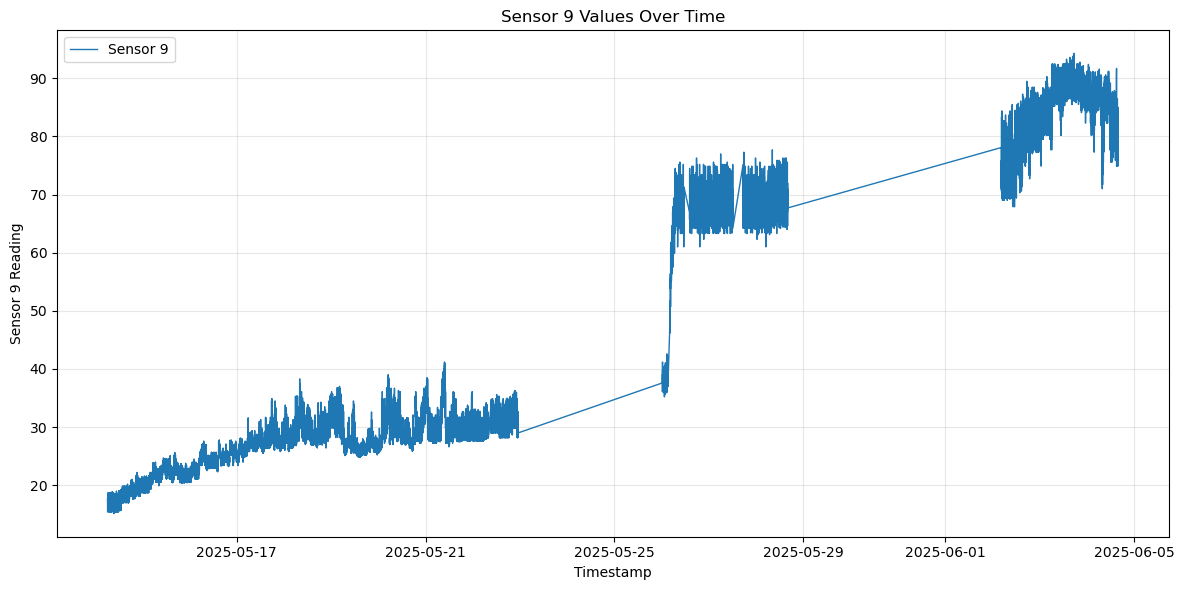

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Extract the sensor-9 series ---
if isinstance(df_wide.columns, pd.MultiIndex):
    # if df_wide.columns looks like [('sensorid', 9), ('sensorid', 10), …]
    sensor9 = df_wide.xs(9, axis=1, level=1)
else:
    sensor9 = df_wide[9]

sensor9 = sensor9.sort_index()  # ensure chronological order

# --- 2. Plot ---
plt.figure(figsize=(12, 6))
plt.plot(sensor9.index, sensor9, label="Sensor 9", linewidth=1)
plt.title("Sensor 9 Values Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Sensor 9 Reading")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


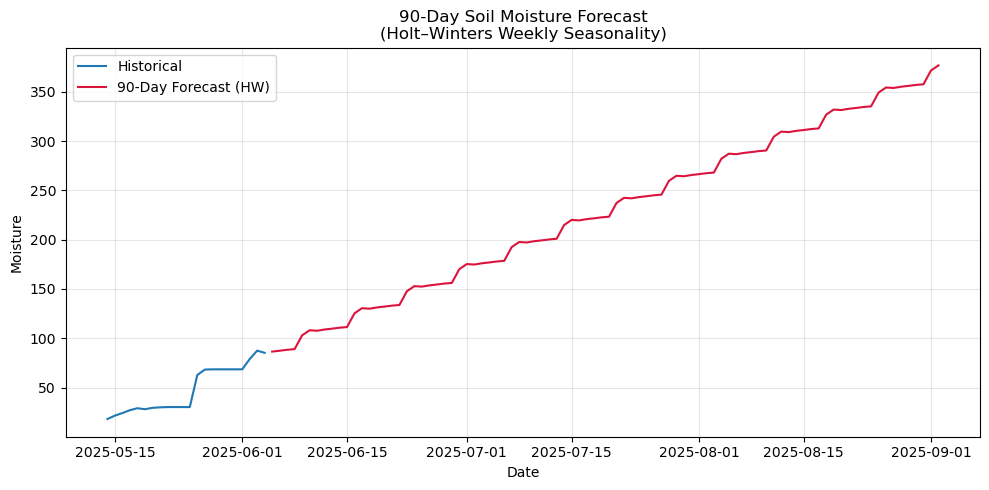

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# 1. Build your daily series for sensor 9
daily9 = (
    df_wide[9]
      .resample('D')
      .mean()
      .ffill()
      .rename('moisture')
)

# 2. Fit Holt–Winters with both trend and weekly seasonality
hw = ExponentialSmoothing(
    daily9,
    trend='add',              # additive (linear) trend
    seasonal='add',           # additive seasonality
    seasonal_periods=7        # 7 days ≈ weekly cycle
)
hw_fit = hw.fit()

# 3. Forecast 90 days
hw_fc = hw_fit.forecast(90)

# 4. Plot
plt.figure(figsize=(10,5))
plt.plot(daily9.index, daily9,                label="Historical")
plt.plot(hw_fc.index,  hw_fc,                 label="90-Day Forecast (HW)", color="crimson")
plt.title("90-Day Soil Moisture Forecast\n(Holt–Winters Weekly Seasonality)")
plt.xlabel("Date"); plt.ylabel("Moisture")
plt.legend(); plt.grid(alpha=0.3)+
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd

# 1. Build the full daily series as before
daily9 = (
    df_wide[9]
      .resample('D')
      .mean()
      .ffill()
      .rename('moisture')
)

# 2. Define your “start” date (when the compost tank was new)
start_date = '2025-05-25'

# 3. Take only the data from that date onward
daily9_recent = daily9.loc[start_date:]


In [26]:
print(daily9_recent.head())
print(f"Using {len(daily9_recent)} days of data starting {daily9_recent.index[0].date()}")


dbtimestamp
2025-05-25    30.169531
2025-05-26    62.687386
2025-05-27    68.190811
2025-05-28    68.457505
2025-05-29    68.457505
Freq: D, Name: moisture, dtype: float64
Using 11 days of data starting 2025-05-25


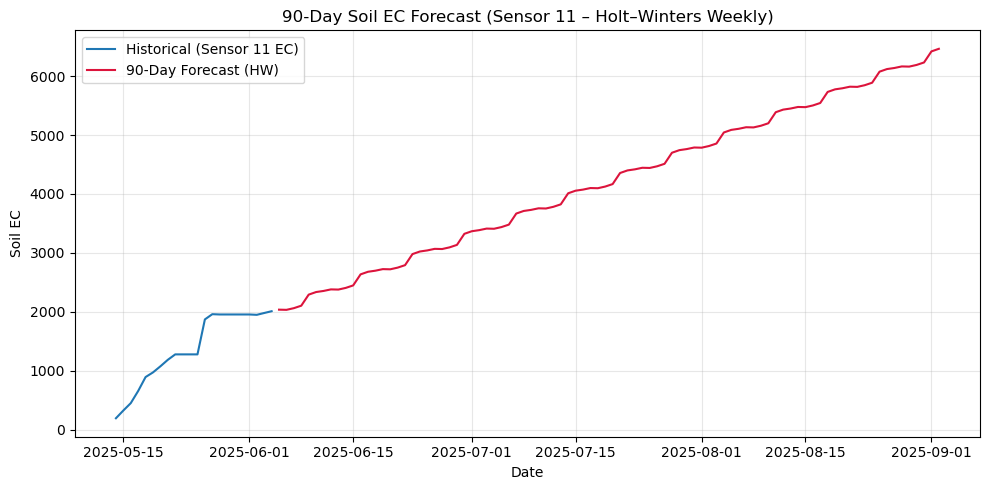

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 1. Build your daily series for sensor 11
daily11 = (
    df_wide[11]           # raw, irregular‐timestamped values for sensor 11
      .resample('D')      # calendar-day bins
      .mean()             # daily mean
      .ffill()            # carry last value forward over gaps
      .rename('ec')       # rename for clarity
)

# 2. Fit Holt–Winters with both trend and weekly seasonality
hw11 = ExponentialSmoothing(
    daily11,
    trend='add',              # additive (linear) trend
    seasonal='add',           # additive seasonality
    seasonal_periods=7        # 7 days ≈ weekly cycle
)
hw11_fit = hw11.fit()

# 3. Forecast 90 days
hw11_fc = hw11_fit.forecast(90)

# 4. Plot historical + forecast
plt.figure(figsize=(10,5))
plt.plot(daily11.index, daily11,               label="Historical (Sensor 11 EC)")
plt.plot(hw11_fc.index,  hw11_fc,              label="90-Day Forecast (HW)", color="crimson")
plt.title("90-Day Soil EC Forecast (Sensor 11 – Holt–Winters Weekly)")
plt.xlabel("Date")
plt.ylabel("Soil EC")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

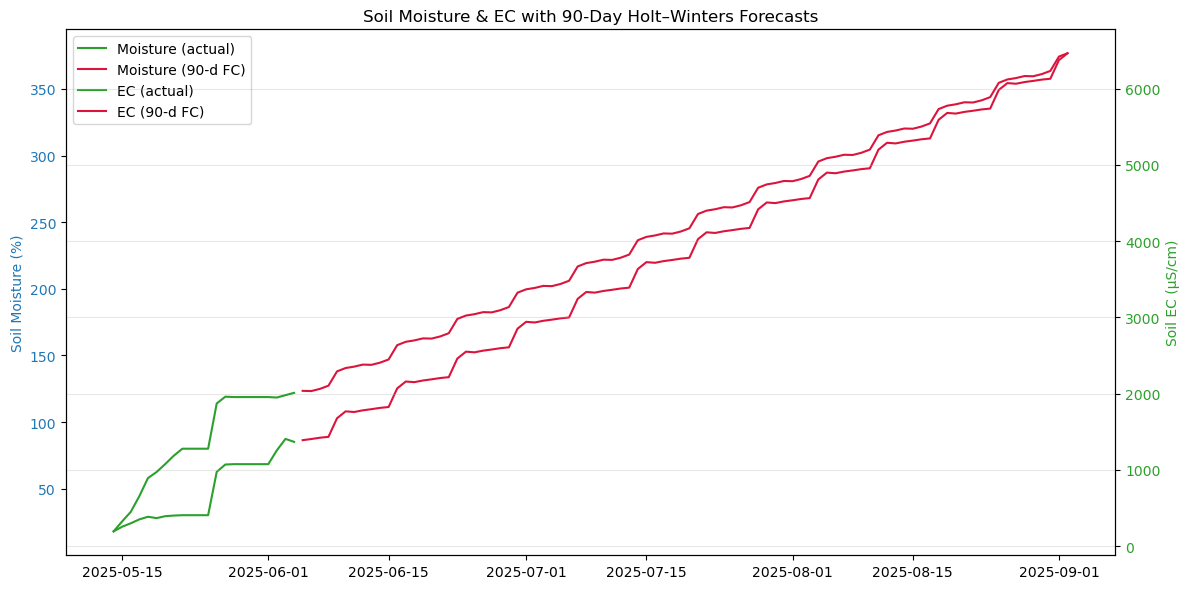

In [80]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 1. Prepare daily series and forecasts for both sensors

# Moisture (sensor 9)
daily9 = (
    df_wide[9]
      .resample('D').mean().ffill().rename('moisture')
)
hw9 = ExponentialSmoothing(daily9, trend='add', seasonal='add', seasonal_periods=7)
hw9_fit = hw9.fit()
hw9_fc  = hw9_fit.forecast(90)

# EC (sensor 11)
daily11 = (
    df_wide[11]
      .resample('D').mean().ffill().rename('ec')
)
hw11 = ExponentialSmoothing(daily11, trend='add', seasonal='add', seasonal_periods=7)
hw11_fit = hw11.fit()
hw11_fc  = hw11_fit.forecast(90)

# 2. Plot on shared x-axis, twin y-axes
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot moisture on left y-axis
ax1.plot(daily9.index,    daily9,    label="Moisture (actual)",       color="tab:green")
ax1.plot(hw9_fc.index,    hw9_fc,    label="Moisture (90-d FC)",      color="crimson")
ax1.set_ylabel("Soil Moisture (%)", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create second y-axis for EC
ax2 = ax1.twinx()
ax2.plot(daily11.index,   daily11,   label="EC (actual)",             color="tab:green")
ax2.plot(hw11_fc.index,   hw11_fc,   label="EC (90-d FC)",            color="crimson")
ax2.set_ylabel("Soil EC (µS/cm)", color="tab:green")
ax2.tick_params(axis="y", labelcolor="tab:green")

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.title("Soil Moisture & EC with 90-Day Holt–Winters Forecasts")
plt.xlabel("Date")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


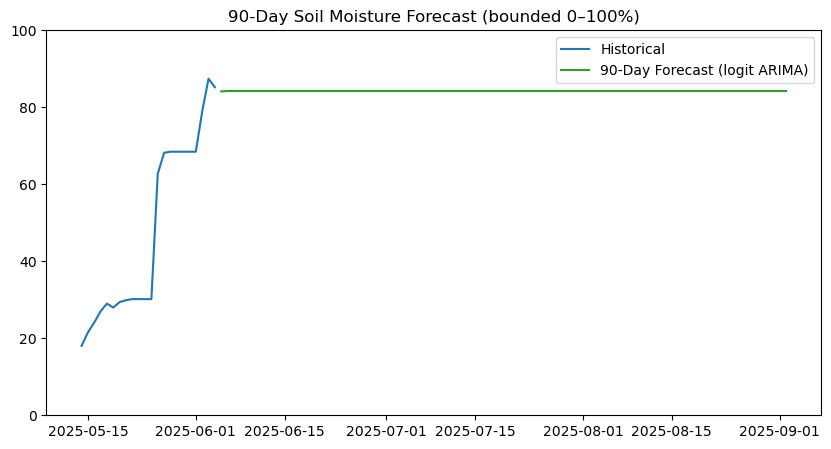

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1) Convert to fraction and keep away from exact 0/1
y = (daily9/100).clip(1e-3, 1-1e-3)

# 2) Take logit
y_logit = np.log(y / (1-y))

# 3) Fit ARIMA on logit‐transformed series
model = SARIMAX(y_logit, order=(1,1,1),
                enforce_stationarity=False,
                enforce_invertibility=False)
res   = model.fit(disp=False)

# 4) Forecast logit
n_forecast = 90
fc_logit   = res.get_forecast(steps=n_forecast).predicted_mean

# 5) Invert logit → fraction
fc_frac    = 1 / (1 + np.exp(-fc_logit))

# 6) Back to percent & clip
fc_pct     = (fc_frac * 100).clip(0,100)

# 7) Plot
plt.figure(figsize=(10,5))
plt.plot(daily9.index,    daily9,    label="Historical")
plt.plot(fc_pct.index,    fc_pct,    label="90-Day Forecast (logit ARIMA)", color="tab:green")
plt.ylim(0,100)
plt.legend()
plt.title("90-Day Soil Moisture Forecast (bounded 0–100%)")
plt.show()


C:\Users\jessi\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\jessi\anaconda3\Lib\site-packages\sklearn\base.py:465: U

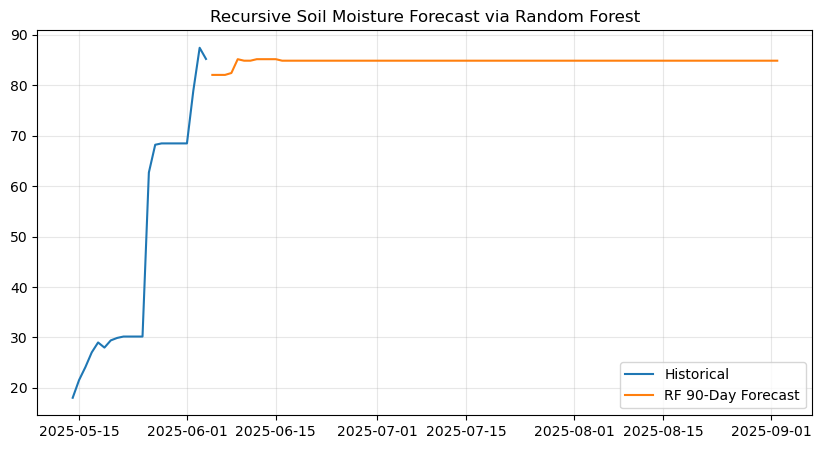

In [88]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# 1. Daily series
daily9 = df_wide[9].resample('D').mean().ffill().rename('moisture')

# 2. Lag features
n_lags = 7
df_lags = pd.DataFrame({'y': daily9})
for lag in range(1, n_lags+1):
    df_lags[f'lag_{lag}'] = df_lags['y'].shift(lag)
df_lags.dropna(inplace=True)

# 3. Train on all
X_all, y_all = df_lags.drop('y', axis=1), df_lags['y']
rf = RandomForestRegressor(n_estimators=200, random_state=0)
rf.fit(X_all, y_all)

# 4. Recursive 90-day forecast
n_forecast = 90
last_obs   = daily9.iloc[-n_lags:].tolist()
preds      = []
for _ in range(n_forecast):
    x = np.array(last_obs[-n_lags:]).reshape(1, -1)
    y_hat = rf.predict(x)[0]
    preds.append(y_hat)
    last_obs.append(y_hat)

# 5. Build series & plot
fc_index = pd.date_range(daily9.index[-1]+pd.Timedelta(days=1),
                         periods=n_forecast, freq='D')
rf_fc = pd.Series(preds, index=fc_index, name='moisture_forecast')

plt.figure(figsize=(10,5))
plt.plot(daily9.index, daily9, label="Historical")
plt.plot(rf_fc.index, rf_fc, label="RF 90-Day Forecast", color="tab:orange")
plt.title("Recursive Soil Moisture Forecast via Random Forest")
plt.legend(); plt.grid(alpha=0.3); plt.show()


03:29:54 - cmdstanpy - INFO - Chain [1] start processing
03:29:54 - cmdstanpy - INFO - Chain [1] done processing


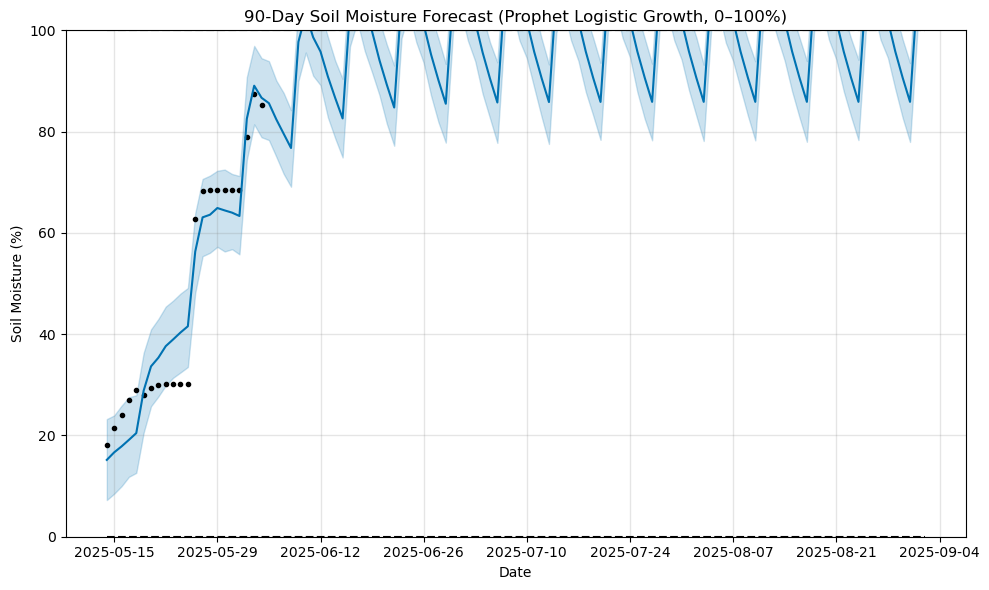

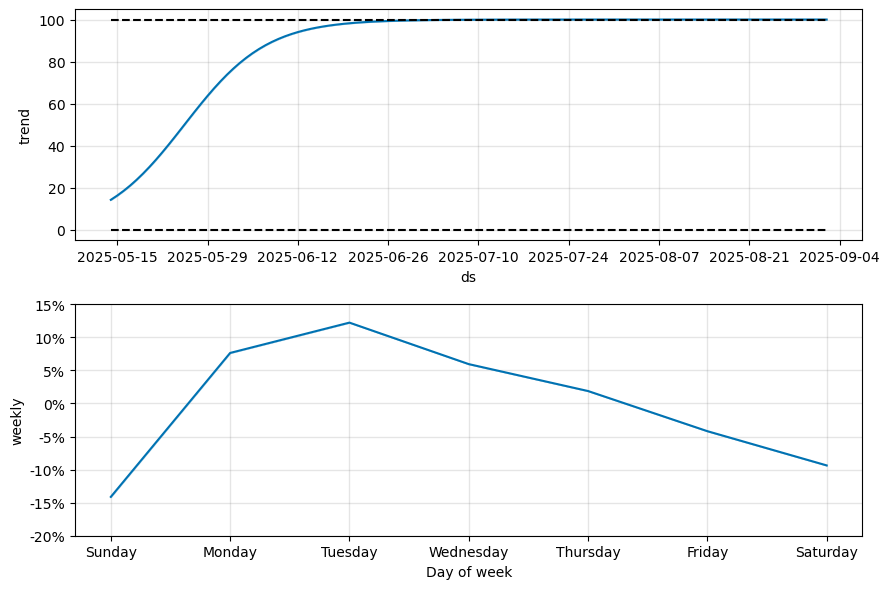

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install prophet
from prophet import Prophet

# 1. Prepare your daily series for soil moisture
daily9 = (
    df_wide[9]
      .resample('D')
      .mean()
      .ffill()
      .rename('y')    # Prophet wants the target column to be 'y'
      .reset_index()
      .rename(columns={'dbtimestamp':'ds'})  # and date column to 'ds'
)

# 2. Add capacity/floor columns
daily9['cap']   = 100.0   # upper bound at 100%
daily9['floor'] =   0.0   # lower bound at  0%

# 3. Instantiate Prophet with logistic growth
m = Prophet(
  growth='logistic',
  seasonality_mode='multiplicative',
  weekly_seasonality=True,
  daily_seasonality=False,
  yearly_seasonality=False
)
m.add_seasonality(name='weekly', period=7, fourier_order=3, mode='additive')

# 4. Fit the model
m.fit(daily9)

# 5. Make a future frame and set its cap/floor
future = m.make_future_dataframe(periods=90, freq='D')
future['cap']   = 100.0
future['floor'] =   0.0

# 6. Forecast
forecast = m.predict(future)

# 7. Plot the results
fig = m.plot(forecast)
plt.title("90-Day Soil Moisture Forecast (Prophet Logistic Growth, 0–100%)")
plt.ylabel("Soil Moisture (%)")
plt.xlabel("Date")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# 8. (Optional) components
fig2 = m.plot_components(forecast)
plt.tight_layout()
